In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("day.csv")

In [3]:
df.shape

(730, 16)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.size

11680

# Data Cleaning and Preparation

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Dropping casual and registered as target variable is cnt, which includes count of total rental bikes including both casual and registered

In [3]:
df = df.drop(["casual", "registered"], axis=1)

#### Dropping instant since its an index which is an extra columns

In [4]:
df = df.drop(["instant"], axis=1)

In [5]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
df["dteday"] = pd.to_datetime(df["dteday"], dayfirst=True)

In [7]:
df.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object

In [8]:
pd.DataFrame({
    'correct_weekday': df.dteday.dt.weekday,
    'mentioned_weekday': df.weekday
}).head()

,correct_weekday,mentioned_weekday
0,0,6
1,1,0
2,2,1
3,3,2
4,4,3


### Note: Weekday column mentioned in the dataset is not correct, value doesn't match with the weekday calculated from dteday. So replacing weekday with correct values

In [9]:
df.weekday = df.dteday.dt.weekday

In [10]:
pd.DataFrame({
    'correct_month': df.dteday.dt.month,
    'mentioned_month': df.mnth
}).head()

,correct_month,mentioned_month
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


#### Dropping dteday since day, month and year data exist

In [11]:
df = df.drop(["dteday"], axis=1)

In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [14]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.000304,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000684,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.006080,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.048541,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,3.042009e-04,6.843499e-04,6.079650e-03,-0.048541,1.000000,0.464121,0.042703,0.029929,0.023235,-0.034223,-0.011361,0.076747
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.464121,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.042703,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.029929,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.023235,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.034223,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [15]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [16]:
numerical_cols = ["cnt", "temp", "atemp", "hum", "windspeed", "yr", "holiday"]
categorical_cols = ["season", "mnth", "weekday", "workingday", "weathersit"]

#### Check for outliers

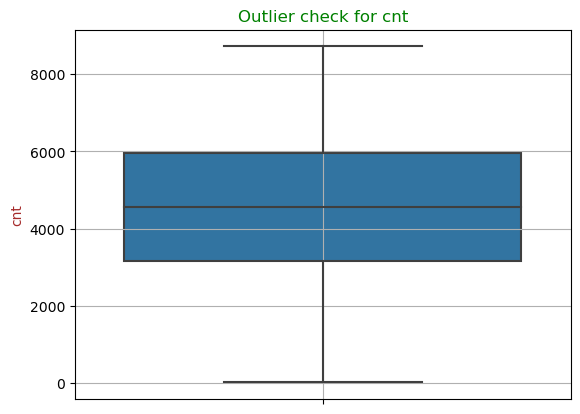

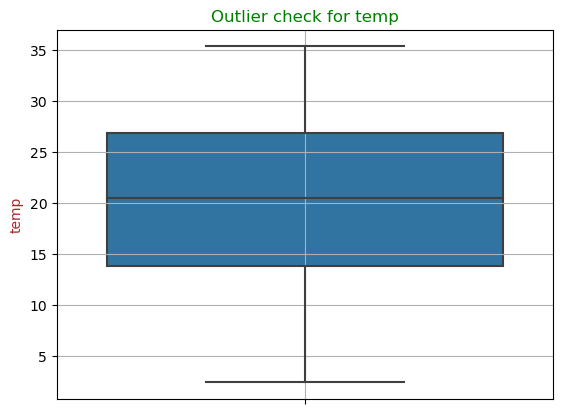

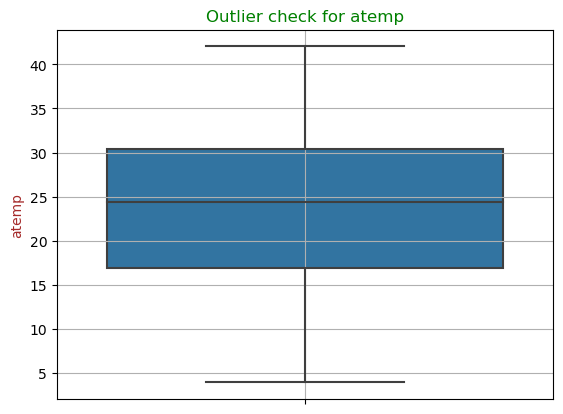

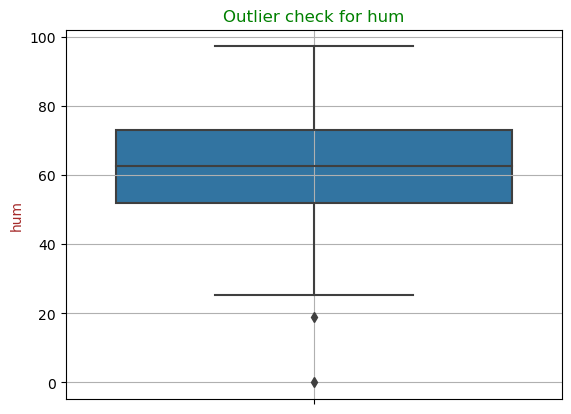

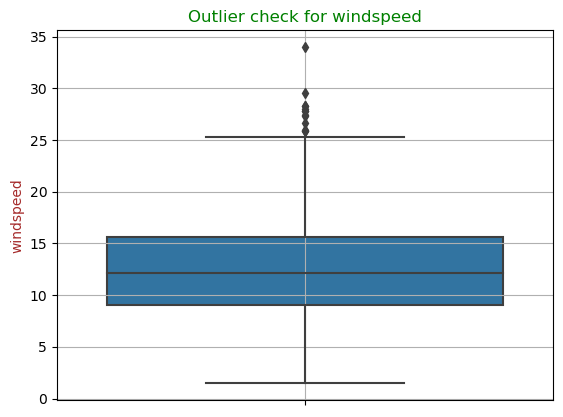

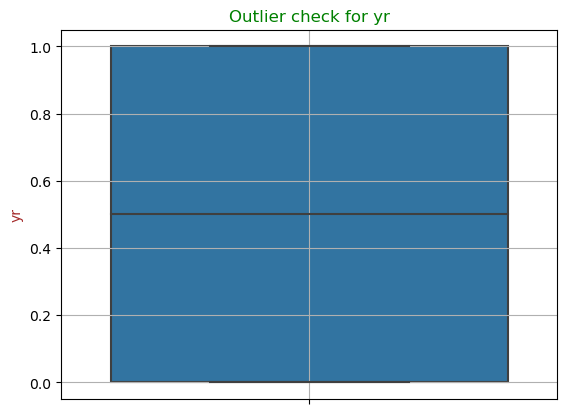

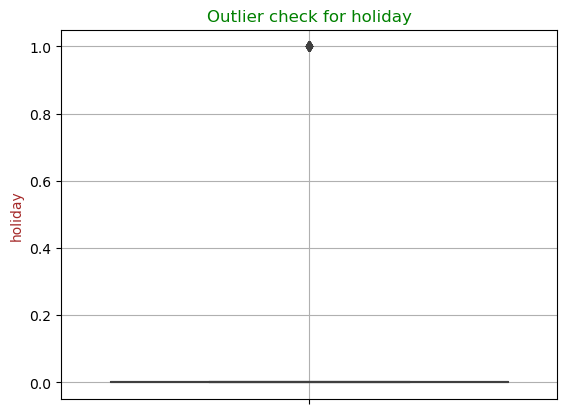

In [17]:
for col in numerical_cols:
    sns.boxplot(y=col, data=df)
    plt.title(f"Outlier check for {col}", color="green")
    plt.ylabel(f"{col}", color="brown")
    plt.grid(True)
    plt.show()

This chart contains four vertical box plots, each labeled for different variables: temp, atemp, hum, and windspeed. Below is a summary of the analysis for each variable:

1. Temperature (temp)
- Range: The temperature values range between approximately 13 and 27.5.
- Outliers: No significant outliers are observed in the data.
- Spread: The data is fairly evenly distributed, with no extreme deviation from the interquartile range (IQR).

2. Apparent Temperature (atemp)
- Range: The apparent temperature values range from about 17 to 30.5.
- Outliers: No major outliers are detected.
- Spread: The box plot suggests a fairly evenly distributed, with no extreme deviation from the interquartile range, but again there is no strong presence of outliers.
3. Humidity (hum)
- Range: Humidity values lie between around 51 and 75.
- Outliers: A few outliers are visible below the lower whisker.
- Spread: The data distribution for humidity appears tight, with the majority of data points concentrated in the upper half of the range.
4. Windspeed (windspeed)
- Range: Windspeed ranges between 9 and 16.
- Outliers: Several outliers exist, primarily above the upper whisker.
- Spread: The windspeed values have a smaller IQR, with outliers extending towards the upper end of the distribution.
<br>
<br>
Observations:
<br>
- Outliers: Outliers are most noticeable for windspeed and humidity, while temp and atemp show no major outliers.
- Spread: The interquartile ranges for all variables except windspeed show a moderate to wide spread, with data points well distributed within their respective ranges.
<br>
<br>
Conclusion:
<br>
- Outliers were observed in the humidity (hum) and windspeed (windspeed) variables, with no significant outliers in temperature (temp) and apparent temperature (atemp).
- Not removing outliers from the dataset as they may represent natural variations or rare but important observations that could provide valuable insights.
- By retaining these outliers, the analysis will reflect the complete dataset, capturing all potential trends and variations, even those occurring at the extreme ends of the data distribution. This approach ensures that no potentially relevant information is discarded.

#### Updating categorical column values

In [18]:
df.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}, inplace = True)

df.mnth.replace({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                  7: "Jul", 8: "Aug", 9: "Sept", 10: "Oct", 11: "Nov", 12: "Dec"}, inplace = True)

df.weekday.replace({0: "Mon", 1: "Tue",2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}, inplace = True)

df.weathersit.replace({1: "Clear Cloud", 2: "Mist Cloud", 3: "Light Snow / Rain", 4: "Heavy Snow / Rain"}, inplace = True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,Mist Cloud,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,0,Mist Cloud,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear Cloud,9.305237,11.46350,43.6957,12.522300,1600


# EDA

C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x2500 with 0 Axes>

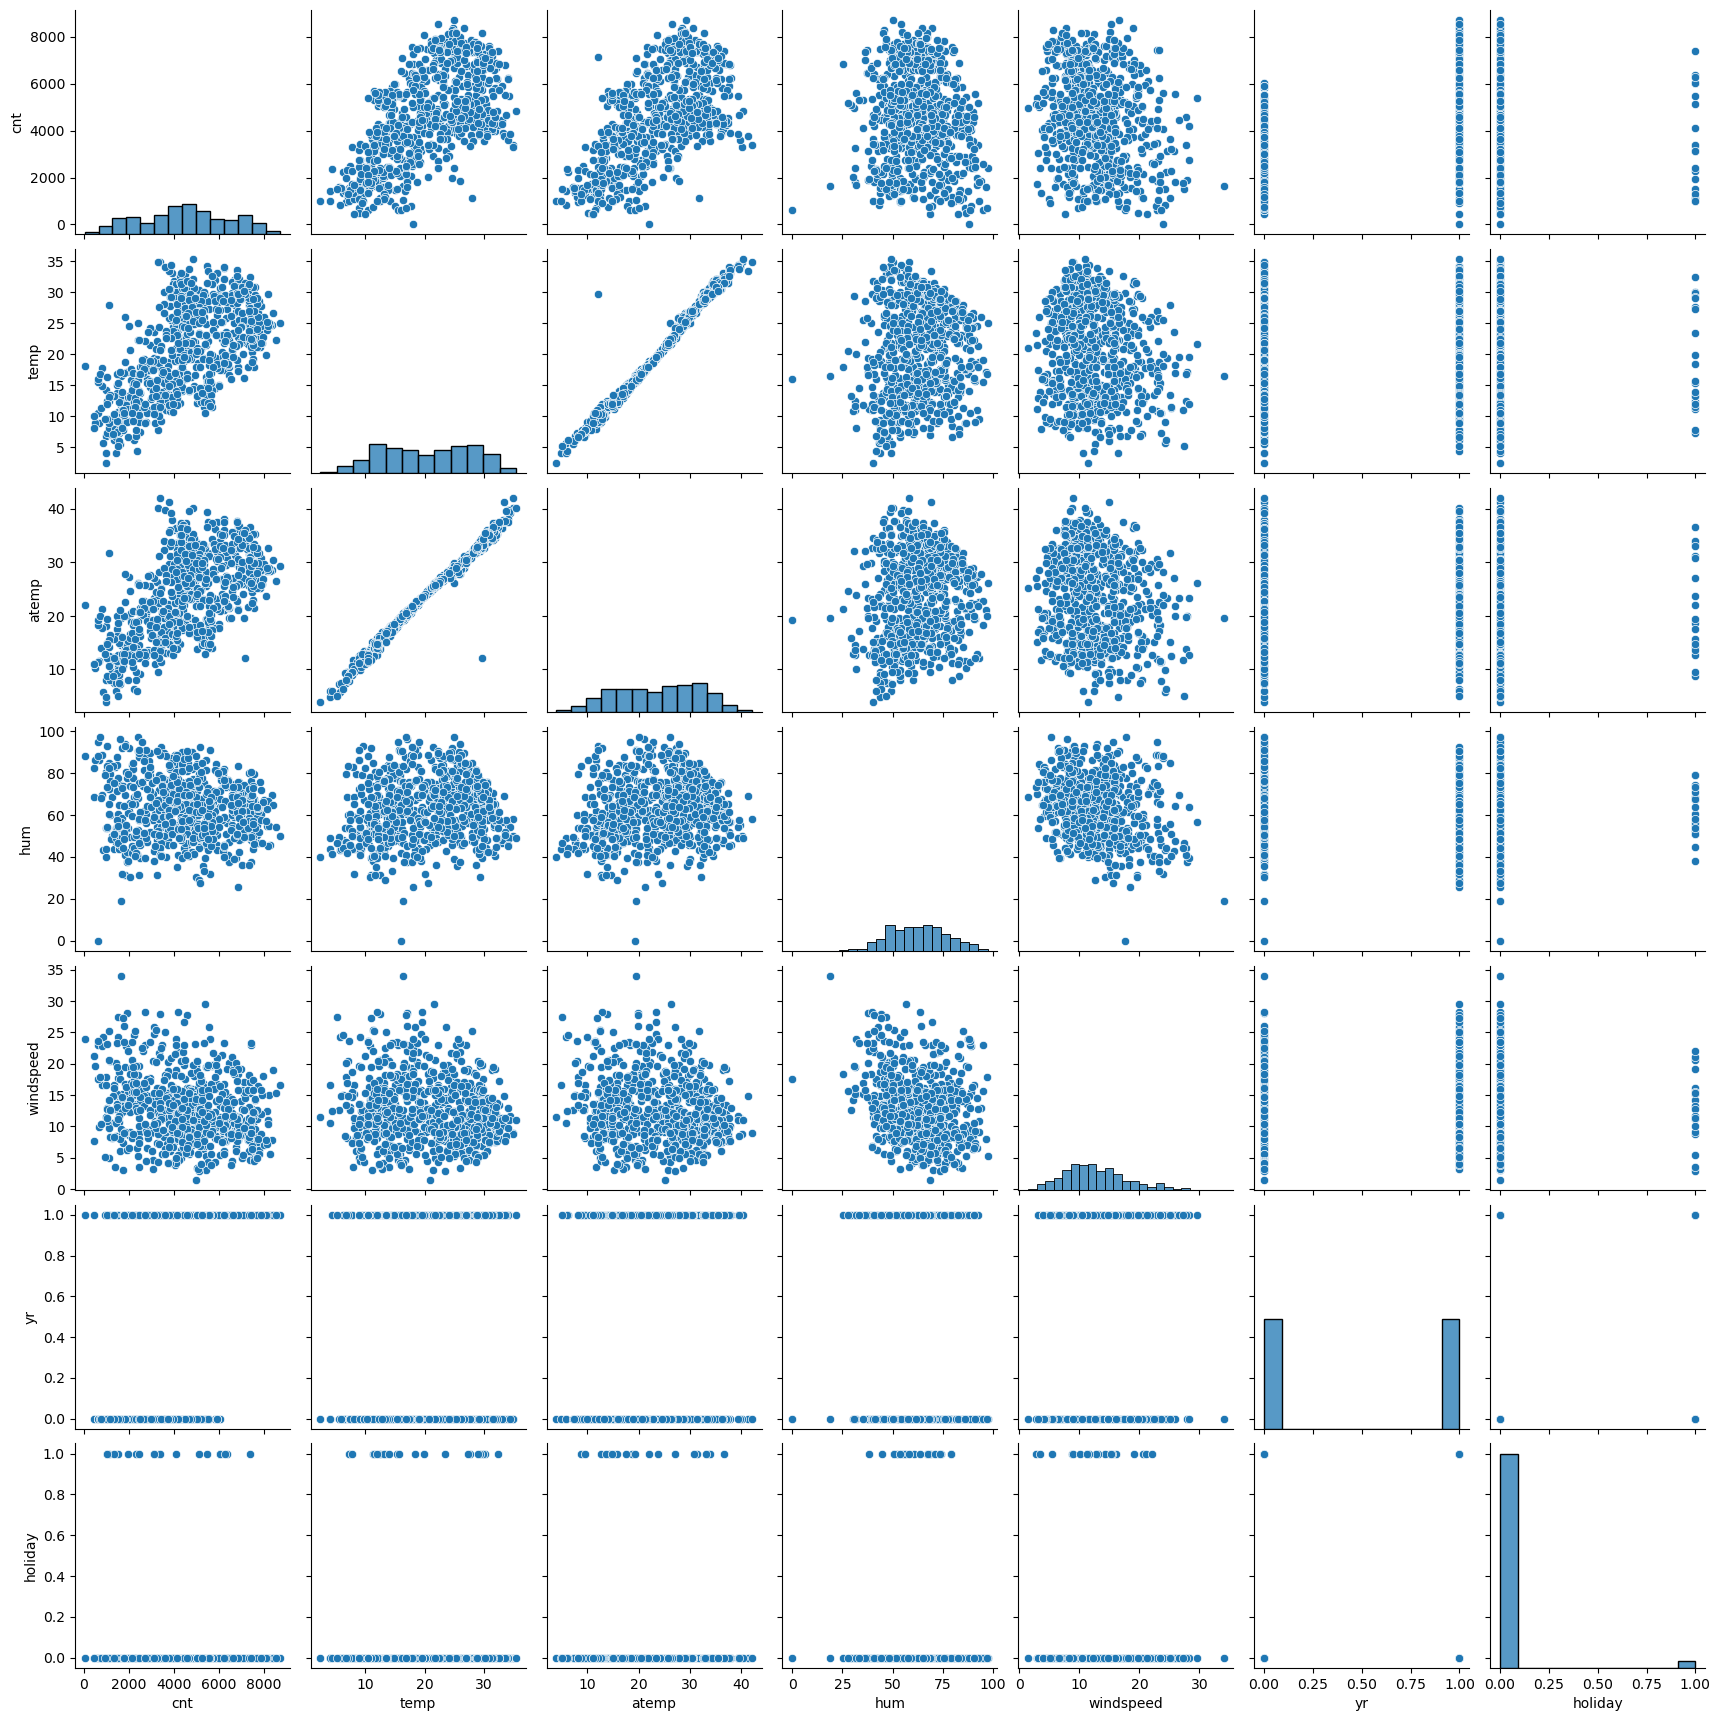

In [25]:
plt.figure(figsize = (15,25))
sns.pairplot(data=df,vars=numerical_cols)
plt.show()

- `temp` and `atemp`: There is a perfect positive correlation (a straight line)
- `cnt` vs. `temp` and `cnt` vs. `atemp`: Both show a positive linear relationship, suggesting that as temperature increases, the count (cnt) also increases.
- `cnt` vs. `hum` and `cnt` vs. `windspeed`: These relationships appear more scattered and less correlated, indicating that humidity and windspeed may not have strong linear effects on count.

C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1500 with 0 Axes>

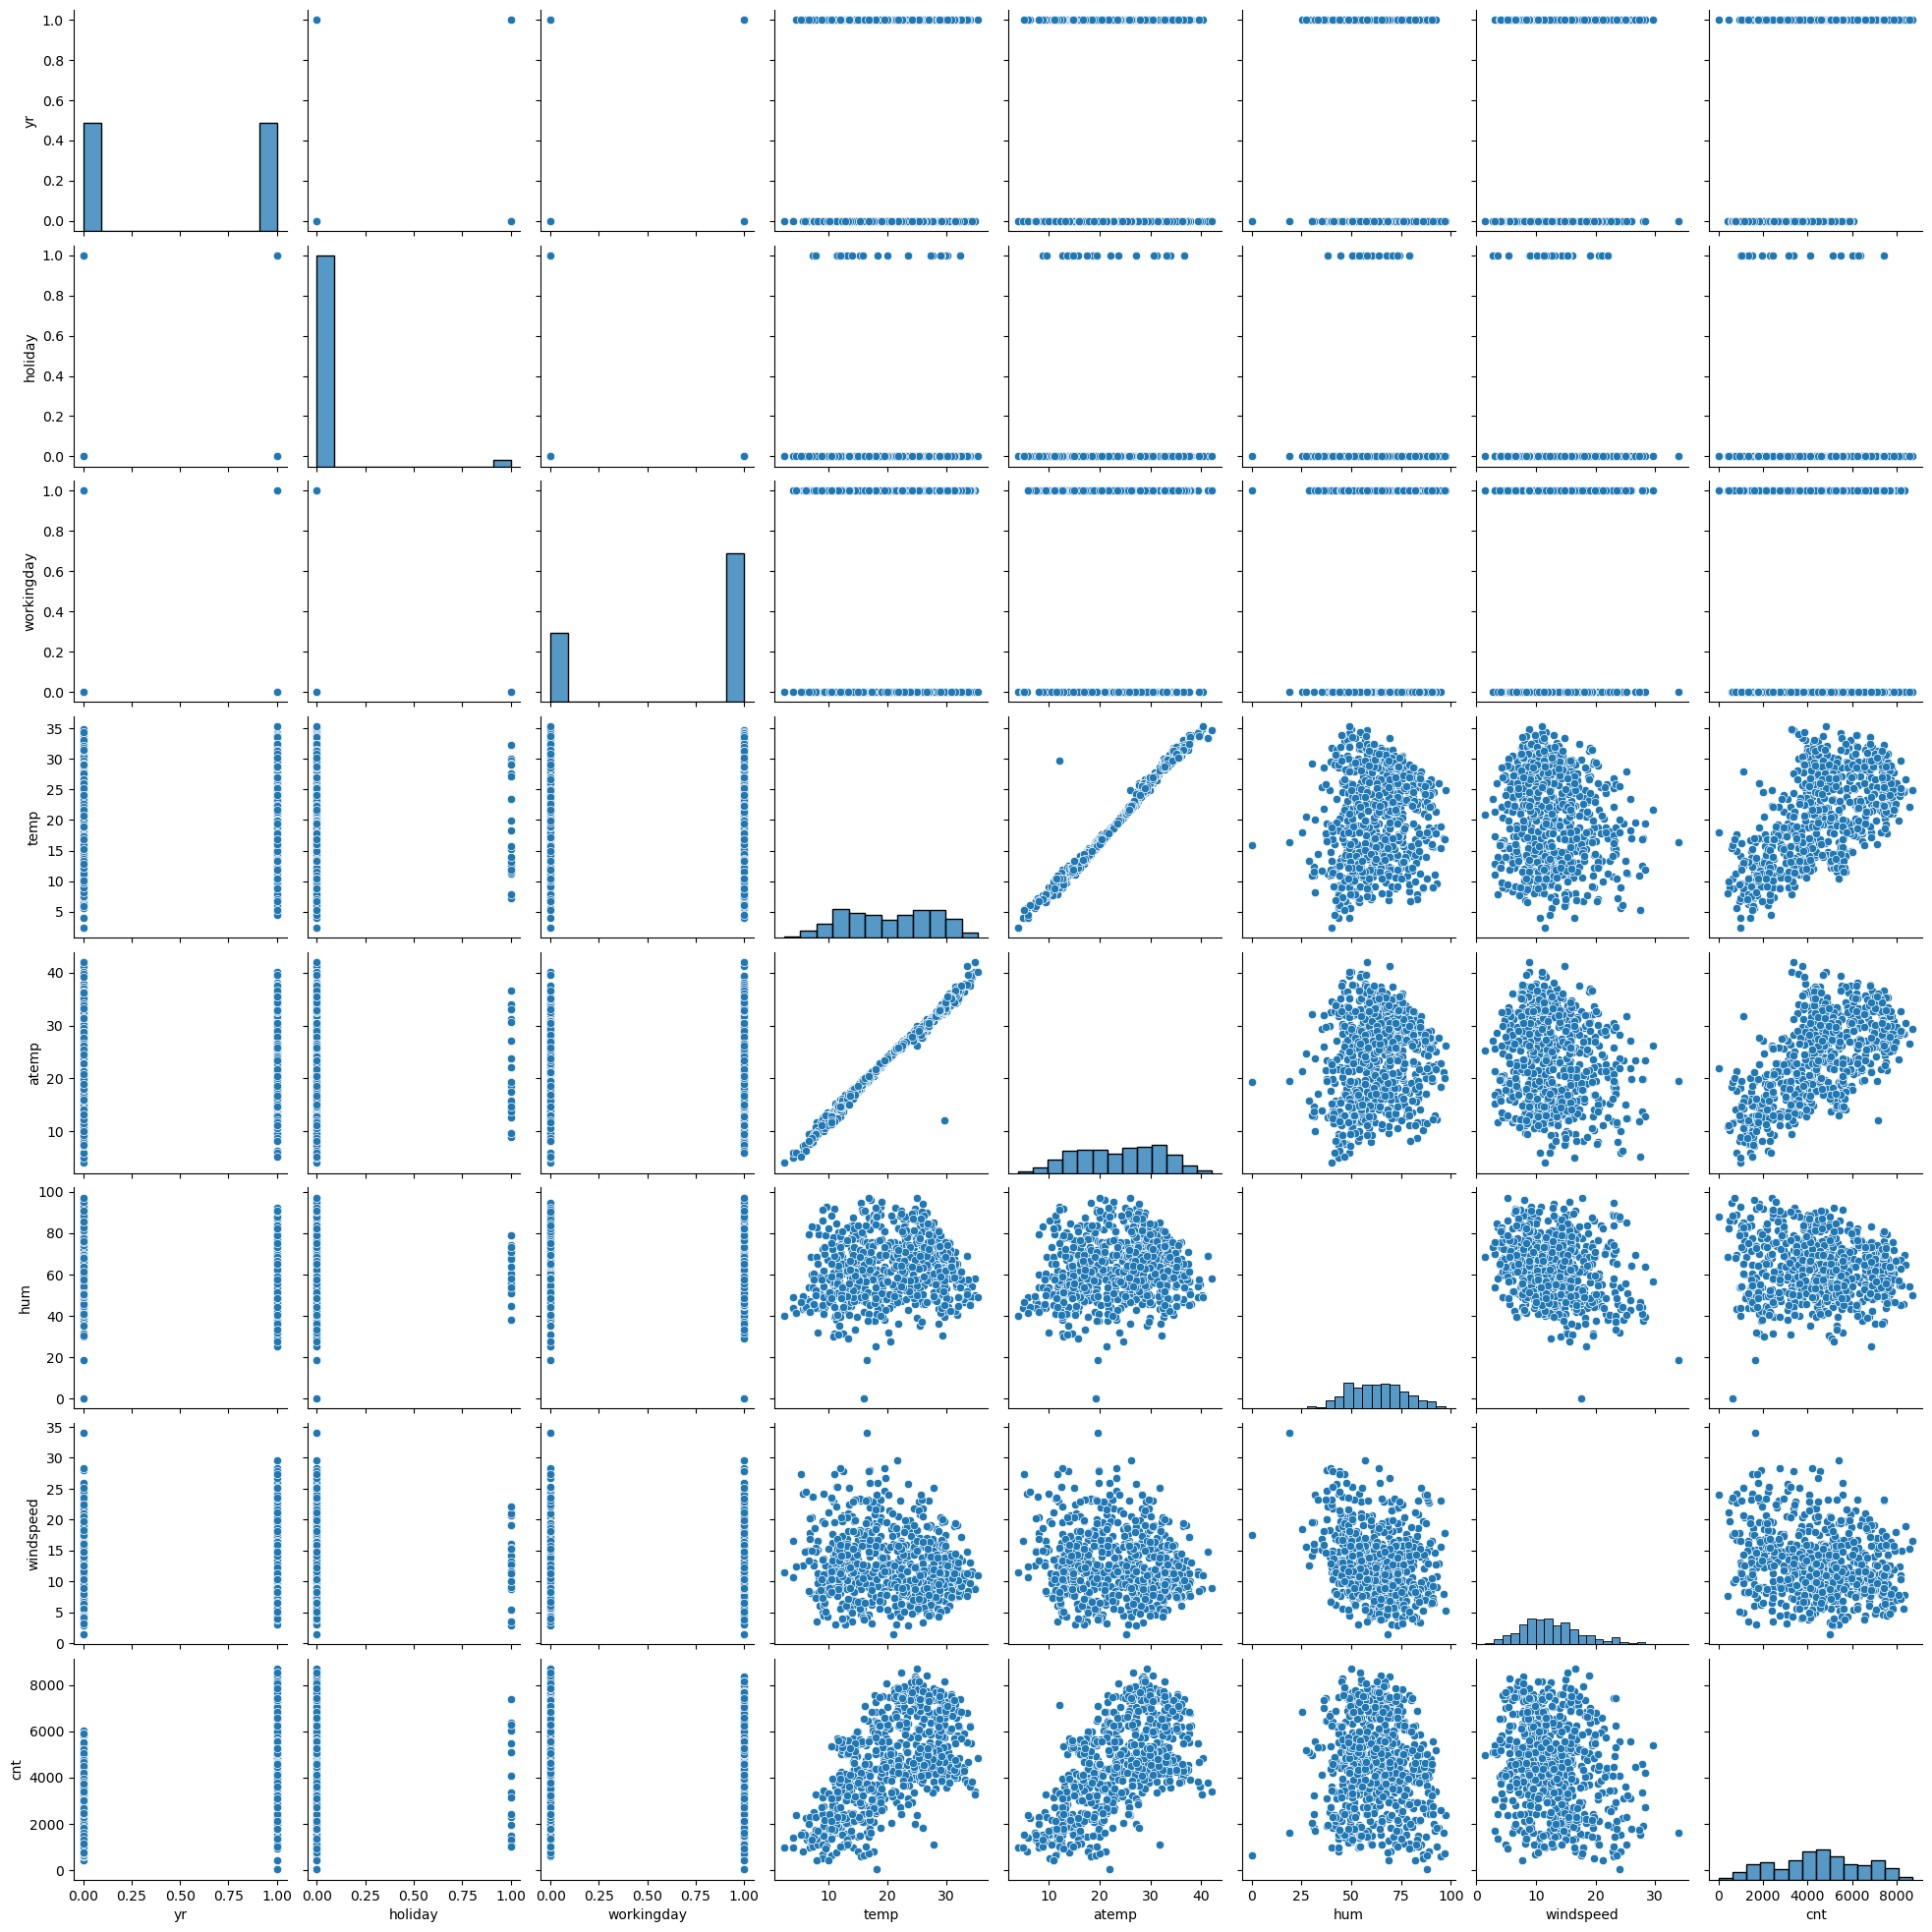

In [26]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

In [19]:
corr_matrix = df[numerical_cols].corr()

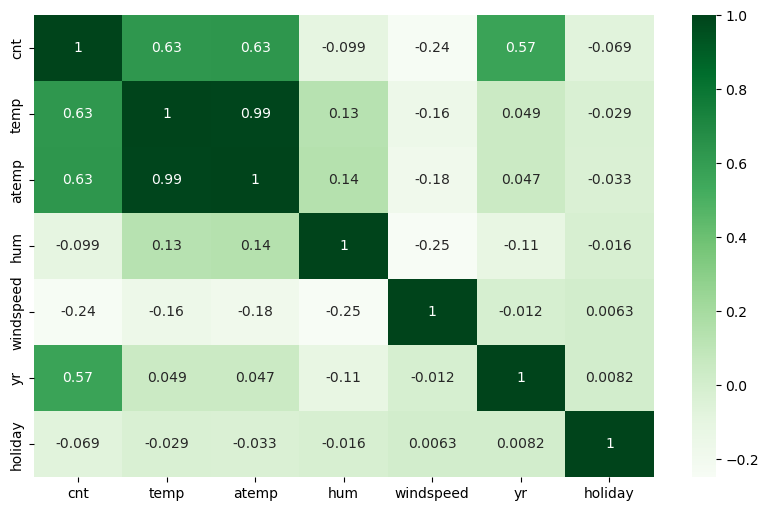

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix,cmap="Greens",annot=True)
plt.show()


- `temp` and `atemp`: The correlation is almost perfect (0.99), as expected since apparent temperature (atemp) is derived from actual temperature (temp).
- `cnt` and `temp/atemp`: There is a strong positive correlation between the count (cnt) and both temp (0.63) and atemp (0.63). This suggests that higher temperatures tend to be associated with higher counts, possibly reflecting an increase in activity or rentals during warmer weather.
- `cnt` and `yr`: A moderate positive correlation (0.57) between cnt and yr, implying that count increases over time (e.g., between different years).
- `cnt` and `windspeed/hum`: Windspeed has a minor negative impact on count, while hum(humidity) has almost no influence.

## Analyzing categorical columns over Count of Rental Bikes

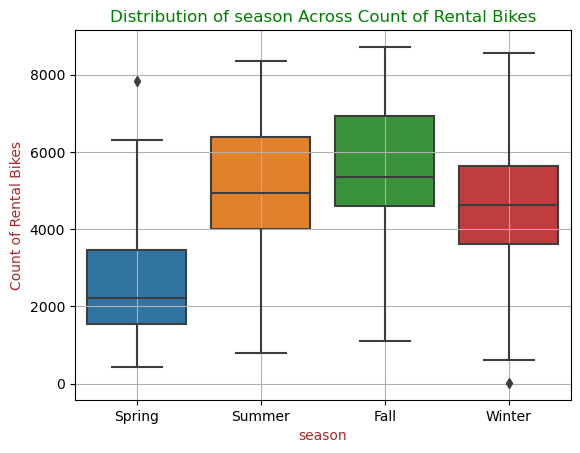

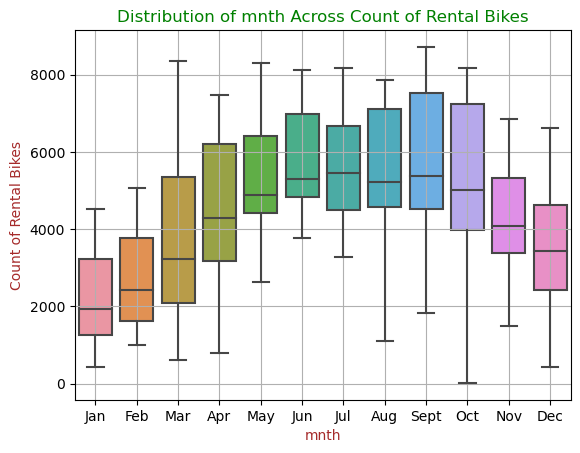

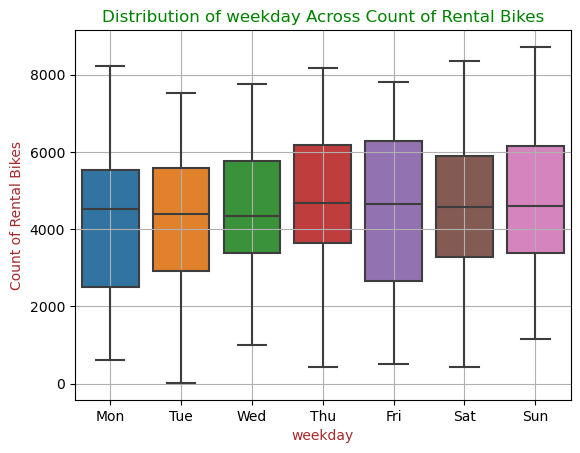

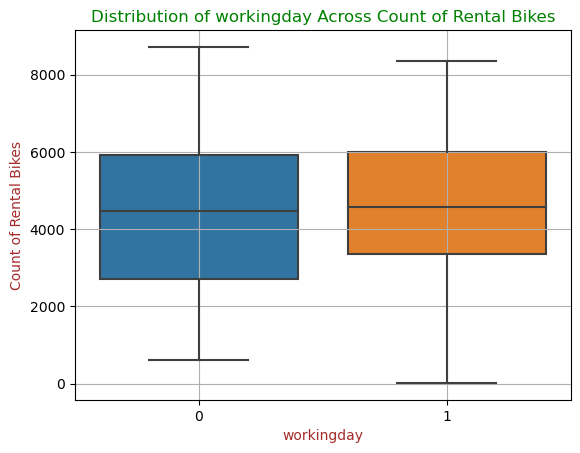

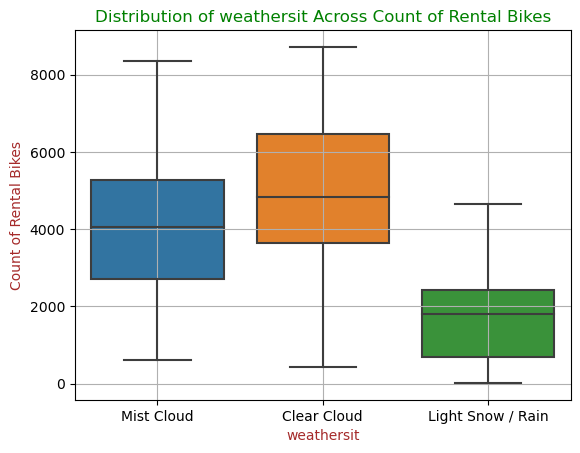

In [20]:
for category in categorical_cols:
    sns.boxplot(x=category, y="cnt", data=df)
    plt.title(f"Distribution of {category} Across Count of Rental Bikes", color="green")
    plt.xlabel(category, color="brown")
    plt.ylabel("Count of Rental Bikes", color="brown")

    plt.grid(True)

    plt.show()

- Seasonal Distribution: The box plot shows the seasonal distribution of bike rentals, indicating higher rentals during summer and fall, moderate in spring, and the lowest in winter. Each season shows variability in rental counts, with winter having the widest range, suggesting fluctuating usage.

- Monthly Distribution: The box plot illustrates the variation in bike rentals by month. The median rental counts appear to be higher in the months from June to September, indicating a peak season during warmer months.

- Weekly Distribution: This plot shows the bike rental counts distributed across the days of the week. The distribution is relatively uniform, suggesting that bike rental usage does not vary significantly from day to day.

- Working Day Distribution: The plot compares bike rental counts on working days (1) versus non-working days (0). There is a slight difference, with higher rentals on working days.

- Weather Condition Distribution: The final plot categorizes bike rentals by weather conditions: mist/cloudy, clear/cloudy, and light snow/rain. Clear or cloudy conditions see the highest median rentals, followed by misty or cloudy conditions, with the lowest rentals occurring during light snow or rain.
<br>
Overall, these plots provide a clear visual representation of how bike rental patterns vary with time (monthly, weekly), whether it is a working day or not, and different weather conditions.


In [21]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Data Preparation for Linear Regression

##### Creating dummy variables

In [22]:
df = pd.get_dummies(data=df, columns=["season", "mnth", "weekday"], drop_first=True)
df = pd.get_dummies(data=df, columns=["weathersit"])

In [23]:
dummy_cols = df.select_dtypes('bool').columns
df[dummy_cols] = df[dummy_cols].astype(int)

In [24]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear Cloud', 'weathersit_Light Snow / Rain',
       'weathersit_Mist Cloud'],
      dtype='object')

In [25]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear Cloud,weathersit_Light Snow / Rain,weathersit_Mist Cloud
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
df.dtypes

yr                                int64
holiday                           int64
workingday                        int64
temp                            float64
atemp                           float64
hum                             float64
windspeed                       float64
cnt                               int64
season_Spring                     int32
season_Summer                     int32
season_Winter                     int32
mnth_Aug                          int32
mnth_Dec                          int32
mnth_Feb                          int32
mnth_Jan                          int32
mnth_Jul                          int32
mnth_Jun                          int32
mnth_Mar                          int32
mnth_May                          int32
mnth_Nov                          int32
mnth_Oct                          int32
mnth_Sept                         int32
weekday_Mon                       int32
weekday_Sat                       int32
weekday_Sun                       int32


# Model Building

In [27]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [28]:
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [29]:
scaler = MinMaxScaler()

In [30]:
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear Cloud,weathersit_Light Snow / Rain,weathersit_Mist Cloud
576,1.0,0.0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1.0,0.0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1.0,0.0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1.0,0.0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0.0,0.0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,1,0,0,0,0,0,1


In [31]:
df_train[numerical_cols].describe()

,cnt,temp,atemp,hum,windspeed,yr,holiday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513499,0.537440,0.513156,0.650480,0.320883,0.507843,0.025490
std,0.224421,0.225858,0.212410,0.145846,0.169803,0.500429,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000
50%,0.518638,0.542596,0.529718,0.653714,0.296763,1.000000,0.000000
75%,0.684710,0.735215,0.688457,0.754830,0.414447,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


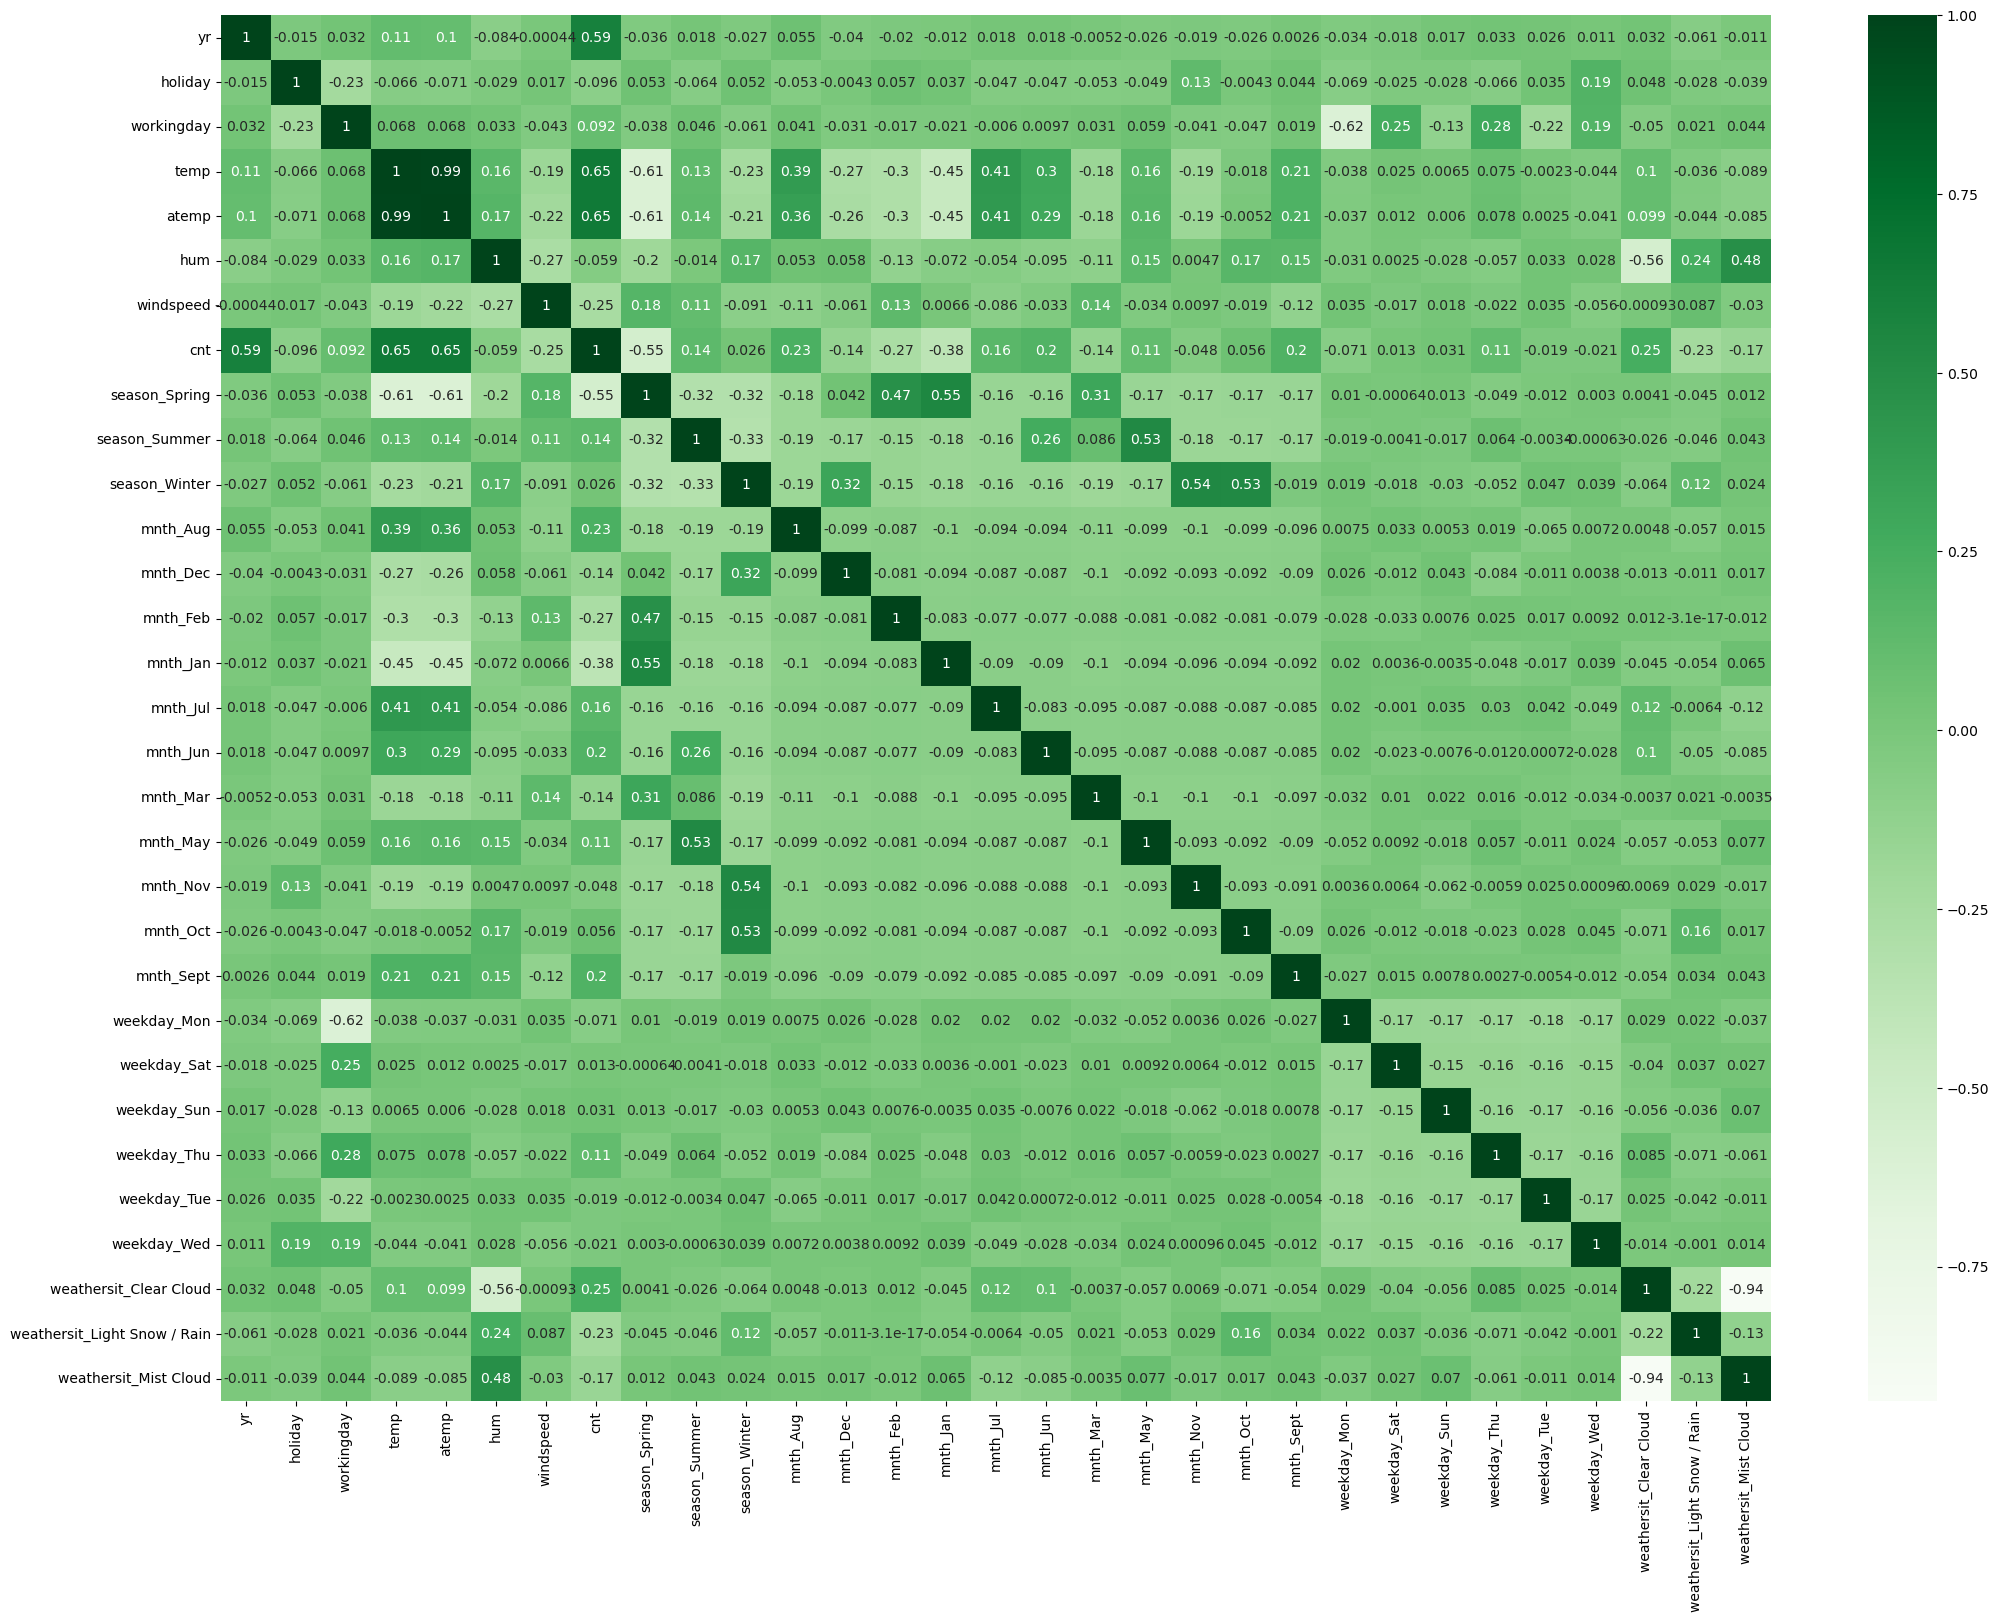

In [41]:
plt.figure(figsize=(25,18))
sns.heatmap(df_train.corr(), cmap="Greens", annot=True)
plt.show()

In [32]:
y_train = df_train.pop("cnt")
X_train = df_train

In [33]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [44]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear Cloud,weathersit_Light Snow / Rain,weathersit_Mist Cloud
576,1.0,0.0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1.0,0.0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1.0,0.0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1.0,0.0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0.0,0.0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,1,0,0,0,0,0,1


# Manual Model Selection

In [34]:
X_train_sm = sm.add_constant(X_train["temp"])

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           2.46e-61
Time:                        06:36:33   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X_train_sm = sm.add_constant(X_train[["temp", "atemp"]])

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           8.38e-61
Time:                        06:36:41   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X_train_sm = sm.add_constant(X_train["atemp"])

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           4.77e-62
Time:                        06:48:46   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
atemp          0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X_train_sm = sm.add_constant(X_train[["atemp", "yr"]])

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.98e-132
Time:                        06:48:48   Log-Likelihood:                 343.25
No. Observations:                 510   AIC:                            -680.5
Df Residuals:                     507   BIC:                            -667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0718      0.015      4.802      0.000       0.042       0.101
atemp          0.6259      0.026     24.092      0.000       0.575       0.677
yr             0.2373      0.011     21.524      0.000       0.216       0.259
==============================================================================
Omnibus:                       38.998   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.230
Skew:                          -0.546   Prob(JB):                     8.34e-14
Kurtosis:                       4.281   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Automated model selection using RFE

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
rfe = RFE(estimator=lr, n_features_to_select=18)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=18)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 9),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 6),
 ('weathersit_Clear Cloud', True, 1),
 ('weathersit_Light Snow / Rain', True, 1),
 ('weathersit_Mist Cloud', True, 1)]

In [41]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [42]:
def get_vif(cols):
    X = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    return vif.sort_values(by='VIF',ascending=False)

In [58]:
col_1 = X_train.columns[rfe.support_]
col_1

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sept', 'weathersit_Clear Cloud',
       'weathersit_Light Snow / Rain', 'weathersit_Mist Cloud'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [60]:
X_train_rfe = X_train[col_1]
X_train_rfe = sm.add_constant(X_train_rfe)
lm1 = build_model(col_1)
get_vif(col_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.85e-187
Time:                        07:03:07   Log-Likelihood:                 515.58
No. Observations:                 510   AIC:                            -995.2
Df Residuals:                     492   BIC:                            -918.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
2,temp,59.16
3,atemp,53.88
15,weathersit_Clear Cloud,53.66
17,weathersit_Mist Cloud,34.76
6,season_Spring,5.79
16,weathersit_Light Snow / Rain,4.30
8,season_Winter,3.98
7,season_Summer,2.94
11,mnth_Jan,2.37
4,hum,1.93


In [76]:
col_2 = ['yr', 'holiday', 'temp', 'windspeed', 'hum', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sept', 'weathersit_Clear Cloud',
       'weathersit_Light Snow / Rain', 'weathersit_Mist Cloud']
lm_2 = build_model(col_2)
get_vif(col_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.94e-188
Time:                        07:29:48   Log-Likelihood:                 515.57
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
14,weathersit_Clear Cloud,53.61
16,weathersit_Mist Cloud,34.72
5,season_Spring,5.69
2,temp,4.73
15,weathersit_Light Snow / Rain,4.28
7,season_Winter,3.84
6,season_Summer,2.82
10,mnth_Jan,2.37
4,hum,1.92
9,mnth_Feb,1.86


In [77]:
col_3 = ['yr', 'holiday', 'temp', 'windspeed', 'hum', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sept', 
       'weathersit_Light Snow / Rain', 'weathersit_Mist Cloud']
lm_3 = build_model(col_3)
get_vif(col_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.94e-188
Time:                        07:30:53   Log-Likelihood:                 515.57
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
4,hum,31.52
2,temp,18.33
5,season_Spring,5.45
3,windspeed,4.73
7,season_Winter,4.07
6,season_Summer,2.82
10,mnth_Jan,2.38
15,weathersit_Mist Cloud,2.33
0,yr,2.09
9,mnth_Feb,1.92


In [78]:
col_3 = ['yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sept', 
       'weathersit_Light Snow / Rain', 'weathersit_Mist Cloud']
lm_3 = build_model(col_3)
get_vif(col_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.44e-185
Time:                        07:34:29   Log-Likelihood:                 506.43
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     494   BIC:                            -913.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
2,temp,5.22
3,windspeed,4.67
4,season_Spring,4.33
6,season_Winter,2.99
5,season_Summer,2.24
9,mnth_Jan,2.21
0,yr,2.08
8,mnth_Feb,1.88
11,mnth_Nov,1.83
10,mnth_Jul,1.60


In [64]:
def build_model_sm(X, y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [79]:
lr = build_model_sm(X_train[col_3], y_train)
print(lr.intercept_, lr.coef_)

0.2586540482574254 [ 0.23480679 -0.08911894  0.42210205 -0.16020125 -0.06052754  0.03142394
  0.08521254 -0.05266977 -0.03854397 -0.07056584 -0.04905846 -0.04473489
  0.06718013 -0.29265851 -0.08003906]


In [80]:
y_train_pred = lr.predict(X_train[col_3])

In [67]:
def plot_res_dist(act, pred):
    sns.displot(act-pred, kde=True, bins=15)
    plt.title("Error Terms")
    plt.xlabel("Errors")

C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


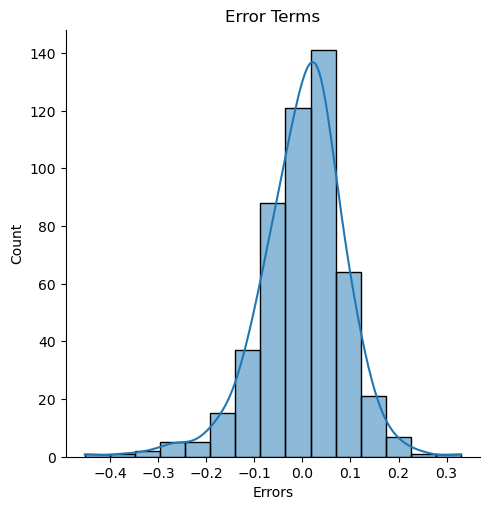

In [81]:
plot_res_dist(y_train, y_train_pred)

In [82]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8401366148225177

In [83]:
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])
df_test.head()

KeyError: "['cnt'] not in index"

In [71]:
y_test = df_test.pop("cnt")
X_test = df_test

In [84]:
X_test_sm_3 = sm.add_constant(X_test[col_3])
y_test_pred_3 = lm_3.predict(X_test_sm_3)

In [86]:
r2_score(y_true=y_test, y_pred=y_test_pred_3)

0.8160122146082718